In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("newMushroom10noise.csv", sep=',')
df.columns.values
df.shape

(5644, 24)

In [3]:
data = df.iloc[:,1:23]
labels = df.iloc[:,23].astype(str)

In [4]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1739
           e       0.95      0.95      0.95      1083

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9620836286321758


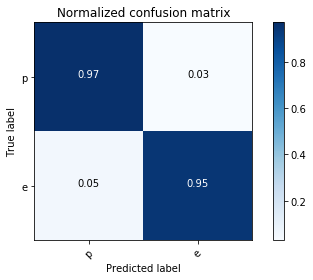

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1749
           e       0.93      0.95      0.94      1073

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9542877391920623


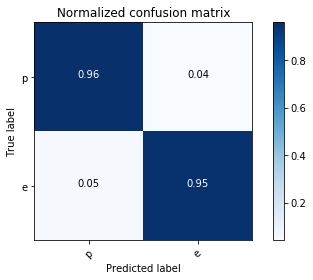

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1748
           e       0.94      0.94      0.94      1074

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9542877391920623


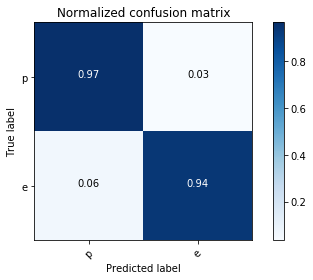

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1740
           e       0.95      0.96      0.95      1082

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9627923458540043


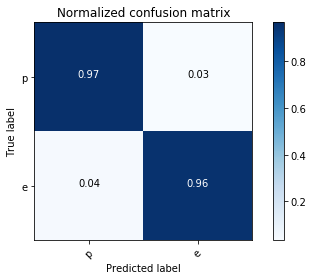

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1777
           e       0.96      0.95      0.95      1045

   micro avg       0.97      0.97      0.97      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.97      0.97      0.97      2822

accuracy:  0.9656272147413182


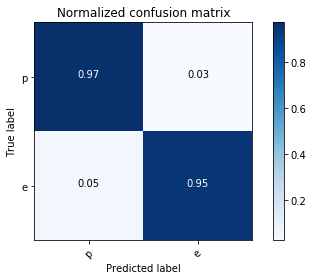

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1711
           e       0.94      0.95      0.94      1111

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.95      0.96      2822

accuracy:  0.9549964564138909


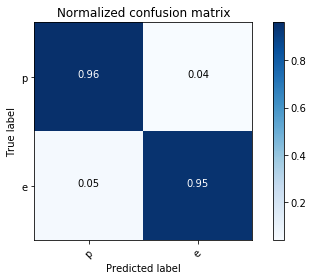

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1735
           e       0.95      0.95      0.95      1087

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9617292700212615


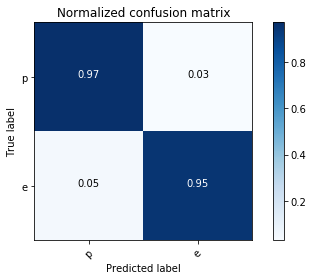

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1753
           e       0.94      0.94      0.94      1069

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9539333805811481


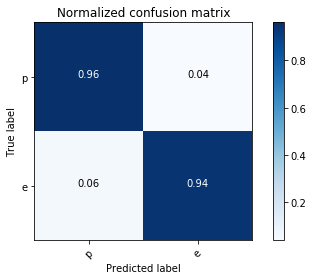

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1706
           e       0.94      0.95      0.95      1116

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9571226080793763


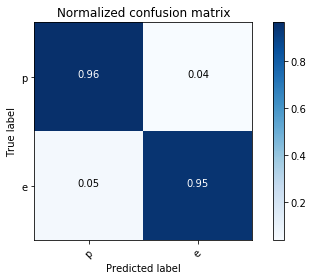

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1782
           e       0.93      0.93      0.93      1040

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9503897944720057


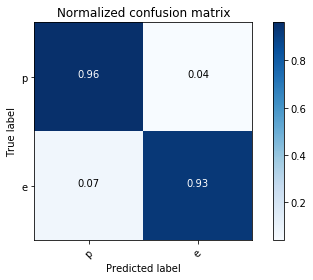

In [6]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1708
           e       0.95      0.93      0.94      1114

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9539333805811481


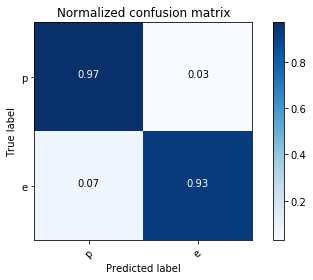

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1780
           e       0.94      0.95      0.94      1042

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9585400425230333


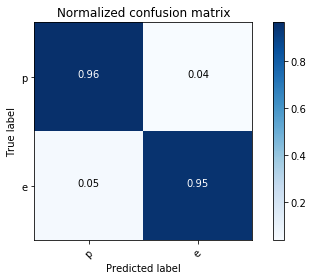

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1743
           e       0.95      0.94      0.94      1079

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


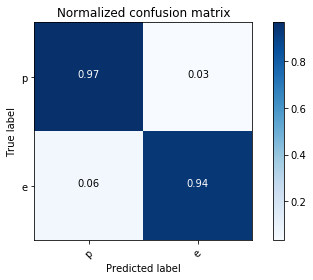

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1745
           e       0.95      0.93      0.94      1077

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9546420978029766


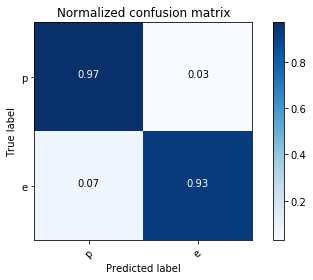

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1739
           e       0.94      0.95      0.95      1083

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9578313253012049


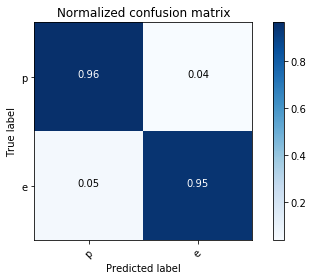

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1749
           e       0.95      0.94      0.94      1073

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


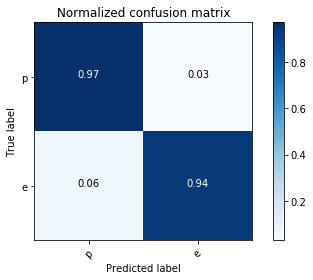

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1788
           e       0.95      0.94      0.94      1034

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.959603118355776


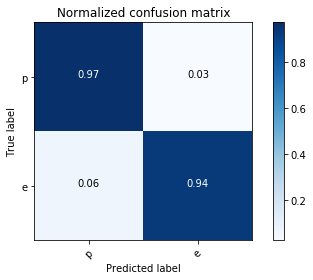

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1700
           e       0.94      0.94      0.94      1122

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9514528703047485


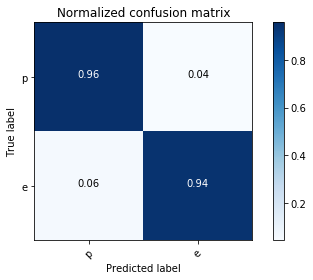

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1761
           e       0.94      0.95      0.94      1061

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


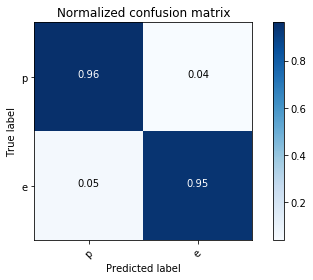

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1727
           e       0.96      0.94      0.95      1095

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9620836286321758


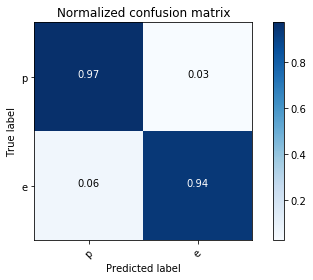

In [7]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1752
           e       0.95      0.93      0.94      1070

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


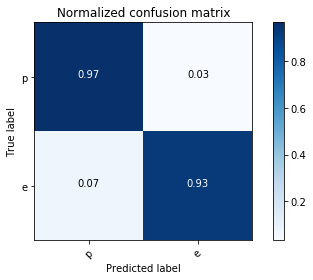

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1736
           e       0.96      0.93      0.94      1086

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


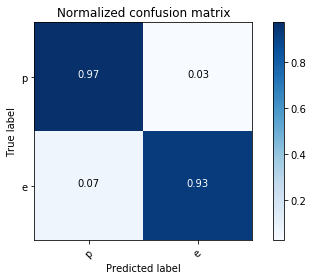

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1746
           e       0.95      0.94      0.94      1076

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


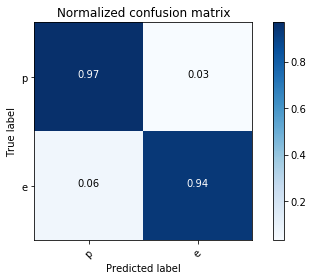

              precision    recall  f1-score   support

           p       0.95      0.98      0.96      1742
           e       0.96      0.92      0.94      1080

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9553508150248051


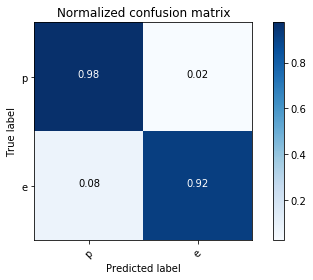

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1761
           e       0.95      0.92      0.93      1061

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9507441530829199


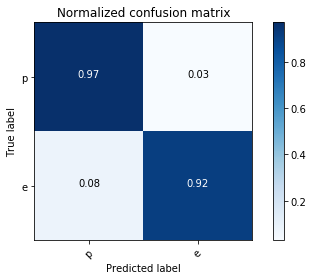

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1727
           e       0.95      0.92      0.94      1095

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9518072289156626


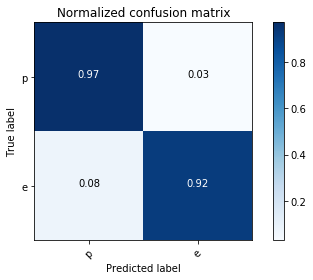

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1746
           e       0.95      0.93      0.94      1076

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9571226080793763


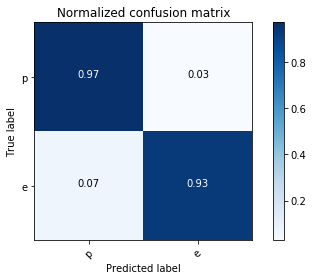

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1742
           e       0.95      0.93      0.94      1080

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9528703047484054


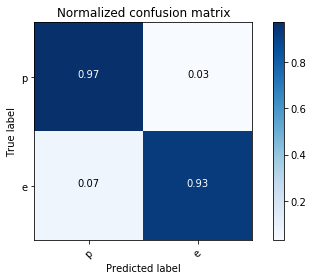

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1749
           e       0.95      0.93      0.94      1073

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


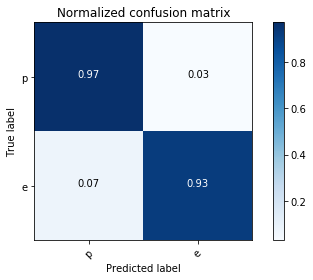

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1739
           e       0.96      0.93      0.94      1083

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


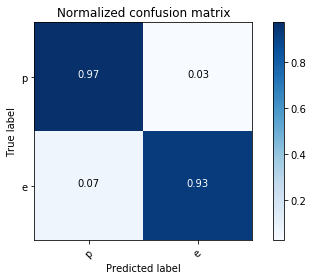

In [8]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1739
           e       0.94      0.94      0.94      1083

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9557051736357194


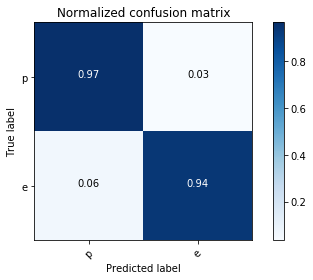

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1749
           e       0.95      0.92      0.93      1073

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9503897944720057


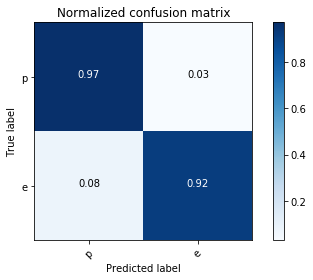

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1751
           e       0.94      0.92      0.93      1071

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9472005669737774


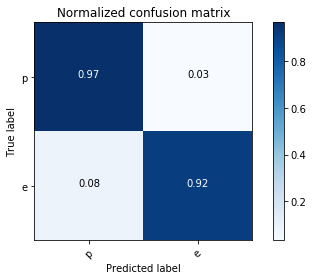

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1737
           e       0.95      0.94      0.94      1085

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9578313253012049


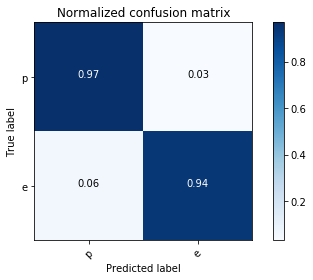

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1712
           e       0.95      0.92      0.94      1110

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9496810772501771


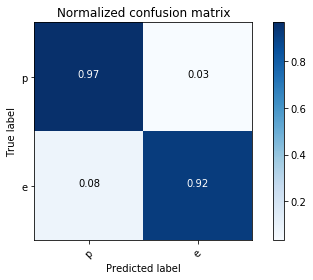

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1776
           e       0.95      0.93      0.94      1046

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9553508150248051


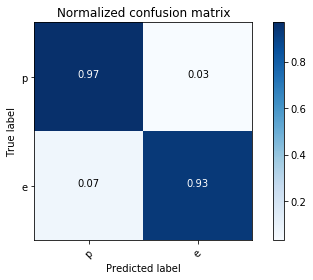

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1742
           e       0.95      0.93      0.94      1080

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9535790219702339


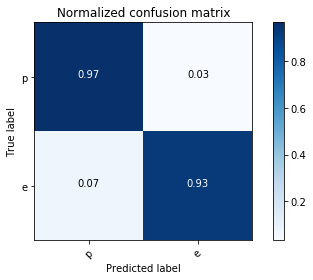

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1746
           e       0.94      0.92      0.93      1076

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9493267186392629


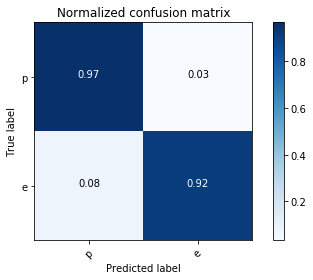

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1748
           e       0.94      0.93      0.94      1074

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9528703047484054


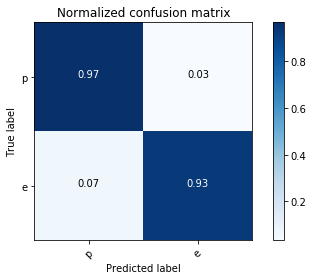

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1740
           e       0.95      0.94      0.94      1082

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9553508150248051


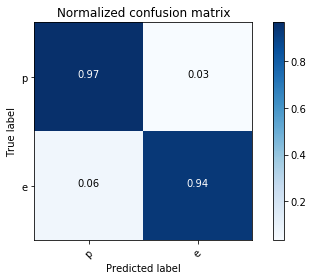

In [9]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1741
           e       0.95      0.92      0.94      1081

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9518072289156626


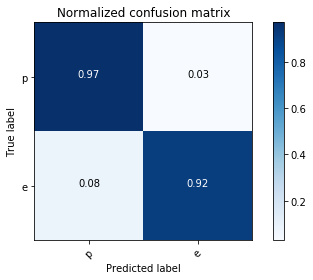

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1747
           e       0.95      0.92      0.93      1075

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9482636428065202


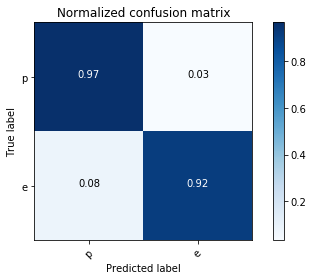

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1760
           e       0.94      0.92      0.93      1062

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9482636428065202


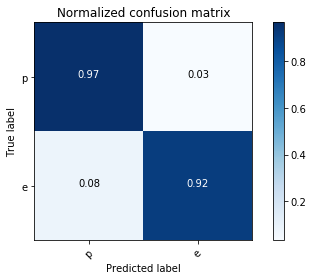

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1728
           e       0.96      0.93      0.94      1094

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.95      0.95      2822

accuracy:  0.9549964564138909


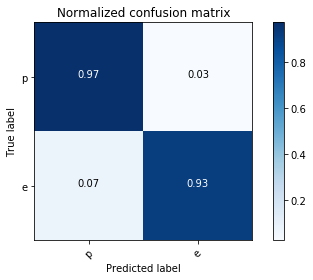

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1749
           e       0.96      0.90      0.93      1073

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9482636428065202


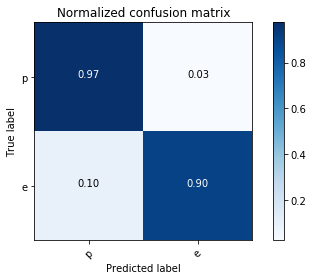

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1739
           e       0.95      0.94      0.94      1083

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


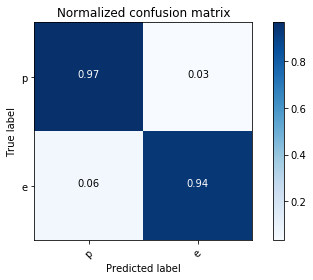

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1723
           e       0.95      0.91      0.93      1099

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9479092841956059


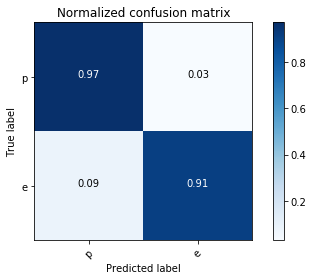

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1765
           e       0.95      0.93      0.94      1057

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


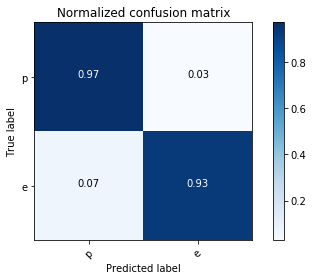

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1737
           e       0.95      0.91      0.93      1085

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9461374911410347


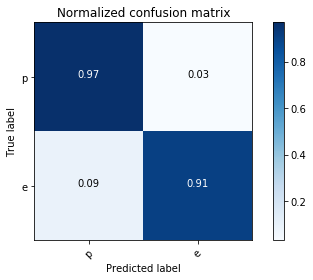

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1751
           e       0.95      0.94      0.94      1071

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9578313253012049


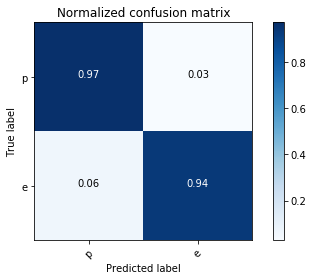

In [10]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1742
           e       0.94      0.89      0.91      1080

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9365698086463501


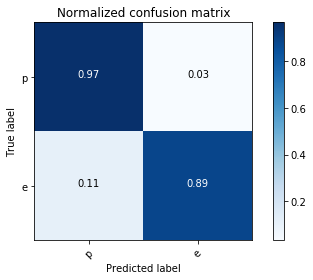

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1746
           e       0.94      0.91      0.92      1076

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.943656980864635


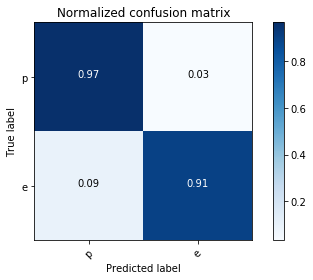

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1731
           e       0.95      0.91      0.93      1091

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9489723600283487


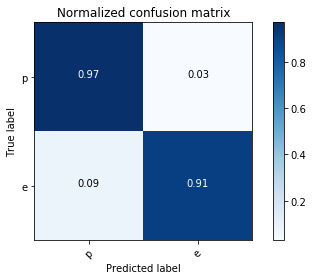

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1757
           e       0.94      0.88      0.91      1065

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.94      0.92      0.93      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9340892983699504


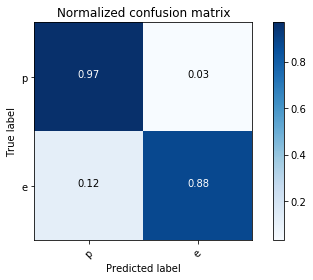

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1734
           e       0.95      0.91      0.93      1088

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9468462083628633


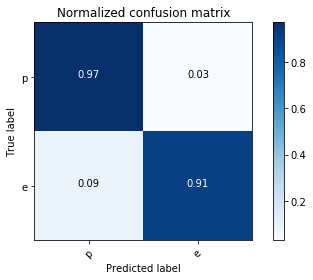

              precision    recall  f1-score   support

           p       0.94      0.97      0.95      1754
           e       0.94      0.90      0.92      1068

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.940822111977321


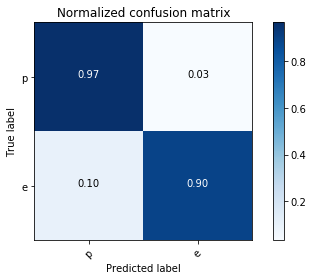

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1731
           e       0.95      0.92      0.93      1091

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9489723600283487


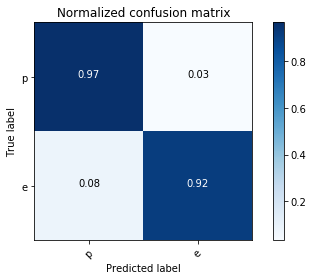

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1757
           e       0.95      0.88      0.91      1065

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9362154500354358


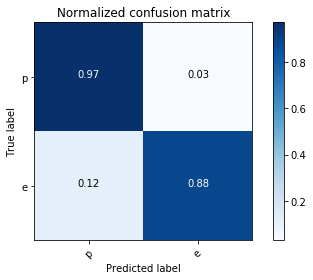

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1741
           e       0.94      0.89      0.91      1081

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9358610914245216


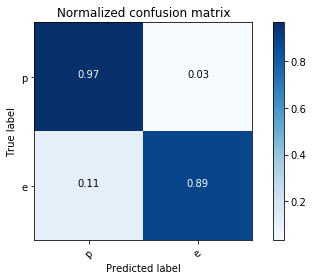

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1747
           e       0.95      0.92      0.94      1075

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9521615875265769


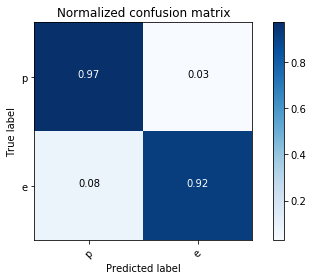

In [11]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1756
           e       0.95      0.85      0.90      1066

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.926293408929837


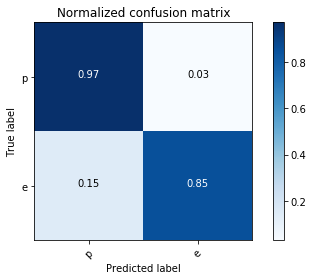

              precision    recall  f1-score   support

           p       0.91      0.97      0.94      1732
           e       0.95      0.84      0.89      1090

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.92      0.92      0.92      2822

accuracy:  0.9227498228206945


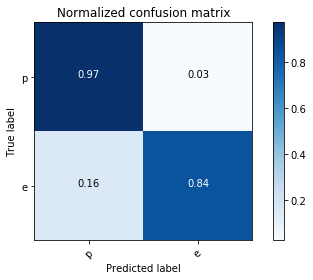

              precision    recall  f1-score   support

           p       0.90      0.97      0.94      1721
           e       0.95      0.84      0.89      1101

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.91      0.91      2822
weighted avg       0.92      0.92      0.92      2822

accuracy:  0.920623671155209


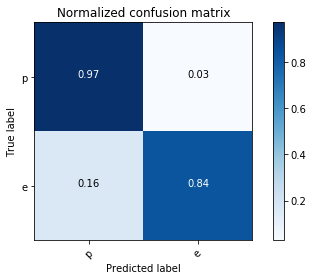

              precision    recall  f1-score   support

           p       0.91      0.98      0.94      1767
           e       0.95      0.85      0.90      1055

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9270021261516654


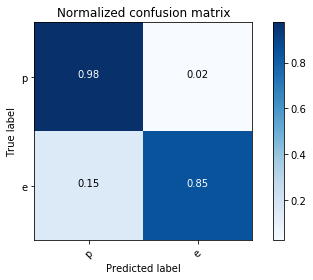

              precision    recall  f1-score   support

           p       0.91      0.98      0.94      1734
           e       0.96      0.85      0.90      1088

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9266477675407513


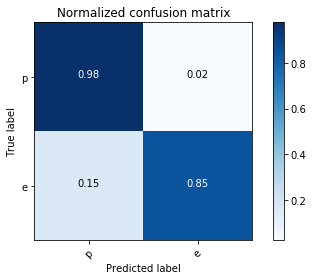

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1754
           e       0.95      0.86      0.90      1068

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.927710843373494


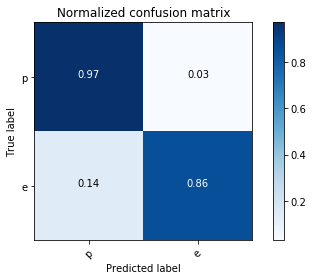

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1752
           e       0.95      0.86      0.90      1070

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.92      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9294826364280652


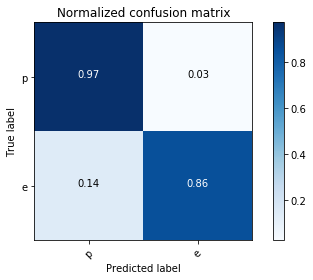

              precision    recall  f1-score   support

           p       0.90      0.97      0.94      1736
           e       0.95      0.83      0.89      1086

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.90      0.91      2822
weighted avg       0.92      0.92      0.92      2822

accuracy:  0.9174344436569809


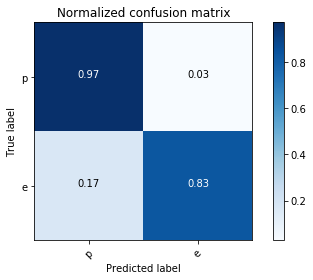

              precision    recall  f1-score   support

           p       0.91      0.98      0.94      1731
           e       0.96      0.85      0.90      1091

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.926293408929837


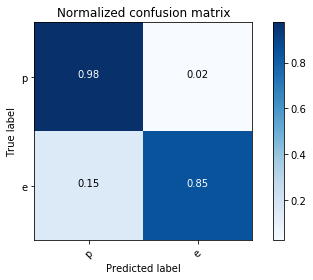

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1757
           e       0.95      0.85      0.90      1065

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9259390503189228


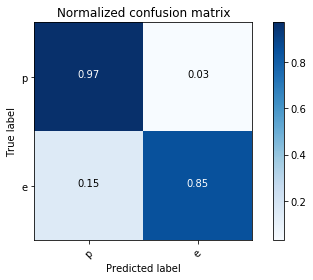

In [12]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.83      0.99      0.90      1692
           e       0.97      0.70      0.81      1130

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.90      0.84      0.86      2822
weighted avg       0.89      0.87      0.87      2822

accuracy:  0.8720765414599575


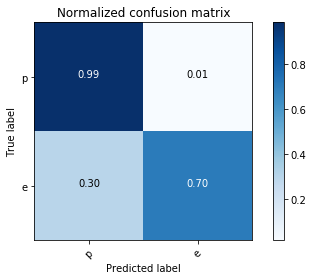

              precision    recall  f1-score   support

           p       0.88      0.98      0.93      1796
           e       0.96      0.76      0.85      1026

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.9029057406094968


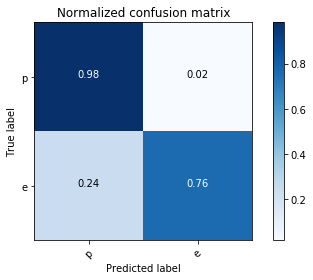

              precision    recall  f1-score   support

           p       0.85      0.99      0.91      1753
           e       0.98      0.71      0.83      1069

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8855421686746988


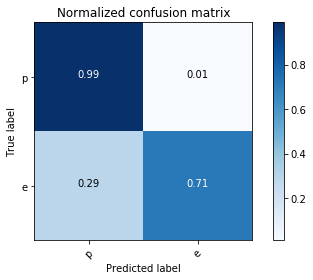

              precision    recall  f1-score   support

           p       0.87      0.98      0.92      1735
           e       0.96      0.77      0.85      1087

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.8982990786676116


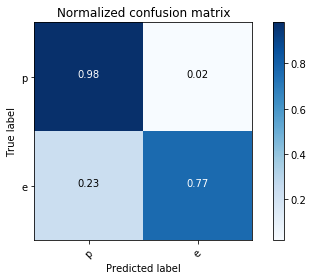

              precision    recall  f1-score   support

           p       0.88      0.98      0.92      1779
           e       0.96      0.76      0.85      1043

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.8997165131112687


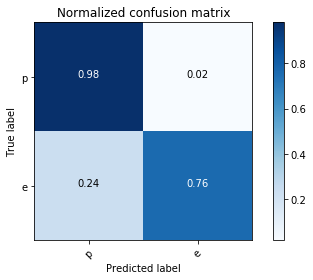

              precision    recall  f1-score   support

           p       0.83      0.99      0.90      1709
           e       0.97      0.69      0.81      1113

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.90      0.84      0.86      2822
weighted avg       0.89      0.87      0.87      2822

accuracy:  0.8706591070163004


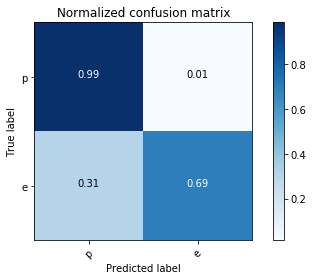

              precision    recall  f1-score   support

           p       0.85      0.99      0.91      1731
           e       0.97      0.71      0.82      1091

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.89      0.88      0.88      2822

accuracy:  0.8816442239546421


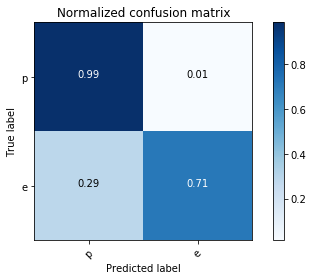

              precision    recall  f1-score   support

           p       0.87      0.98      0.92      1757
           e       0.97      0.75      0.85      1065

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.87      0.89      2822
weighted avg       0.91      0.90      0.89      2822

accuracy:  0.8979447200566973


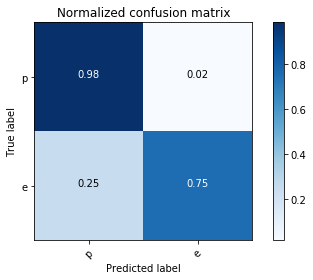

              precision    recall  f1-score   support

           p       0.85      0.98      0.91      1720
           e       0.97      0.73      0.83      1102

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.86      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8862508858965273


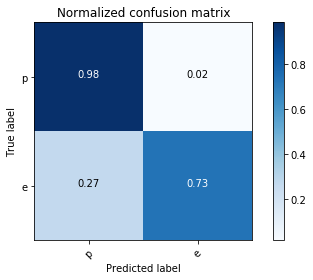

              precision    recall  f1-score   support

           p       0.86      0.98      0.92      1768
           e       0.96      0.72      0.83      1054

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.8869596031183558


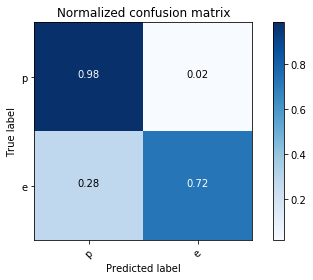

In [13]:
acc.append("Euclidean 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1728
           e       0.98      0.65      0.78      1094

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8600283486888731


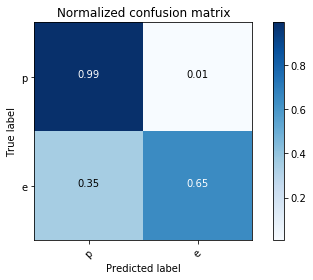

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1760
           e       0.98      0.65      0.78      1062

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8625088589652729


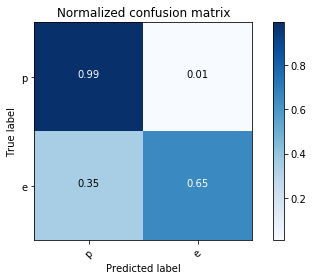

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1734
           e       0.98      0.66      0.79      1088

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.86      2822

accuracy:  0.8625088589652729


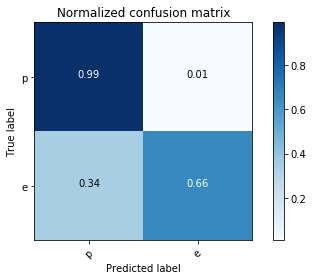

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1754
           e       0.98      0.63      0.77      1068

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.81      0.83      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8554216867469879


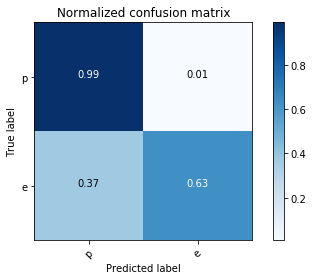

              precision    recall  f1-score   support

           p       0.81      0.99      0.89      1736
           e       0.98      0.63      0.77      1086

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.90      0.81      0.83      2822
weighted avg       0.88      0.85      0.84      2822

accuracy:  0.8525868178596739


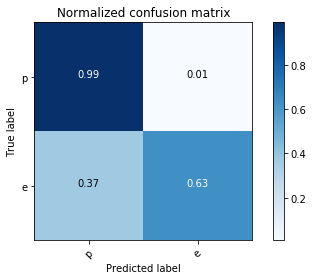

              precision    recall  f1-score   support

           p       0.83      0.99      0.91      1752
           e       0.98      0.67      0.80      1070

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.91      0.83      0.85      2822
weighted avg       0.89      0.87      0.86      2822

accuracy:  0.8706591070163004


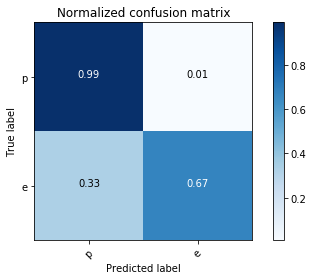

              precision    recall  f1-score   support

           p       0.83      0.99      0.90      1744
           e       0.98      0.67      0.80      1078

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.91      0.83      0.85      2822
weighted avg       0.89      0.87      0.86      2822

accuracy:  0.8703047484053863


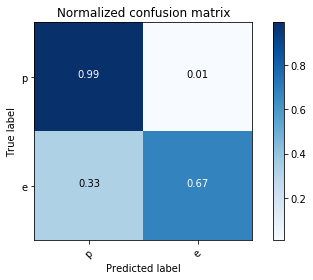

              precision    recall  f1-score   support

           p       0.81      0.99      0.89      1744
           e       0.98      0.62      0.76      1078

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.89      0.81      0.83      2822
weighted avg       0.87      0.85      0.84      2822

accuracy:  0.8515237420269313


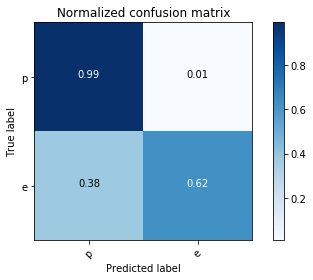

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1751
           e       0.98      0.65      0.78      1071

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8610914245216159


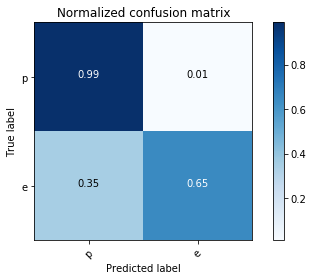

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1737
           e       0.98      0.65      0.78      1085

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.86      2822

accuracy:  0.8625088589652729


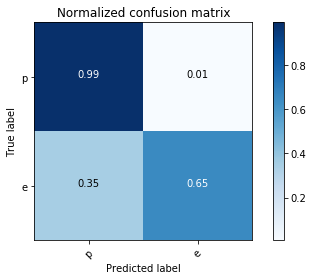

In [14]:
acc.append("Euclidean 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1743
           e       0.95      0.95      0.95      1079

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9606661941885187


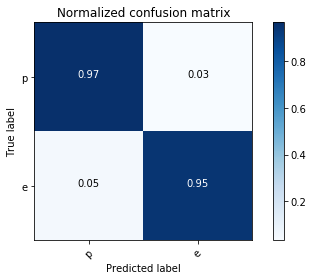

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1745
           e       0.95      0.94      0.94      1077

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9578313253012049


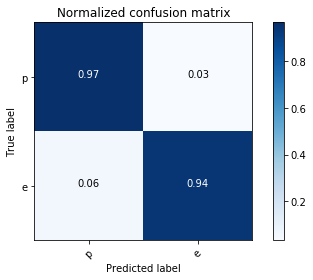

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1743
           e       0.94      0.94      0.94      1079

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9567682494684621


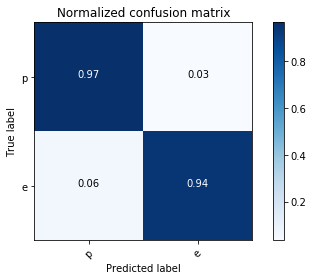

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1745
           e       0.95      0.95      0.95      1077

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9606661941885187


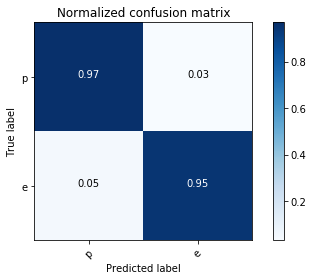

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1762
           e       0.94      0.95      0.94      1060

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


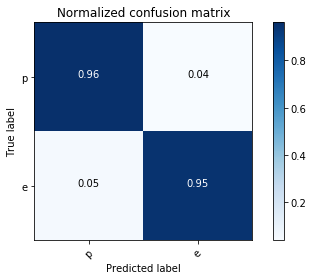

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1726
           e       0.95      0.94      0.94      1096

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


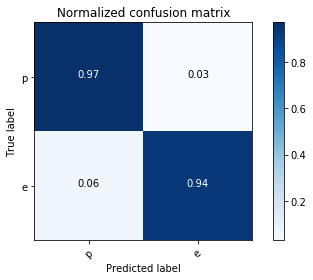

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1773
           e       0.94      0.95      0.95      1049

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9592487597448618


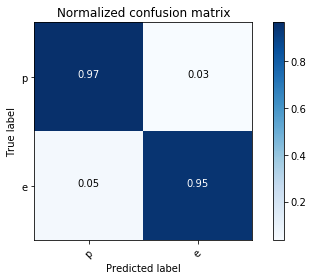

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1715
           e       0.95      0.94      0.95      1107

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9588944011339475


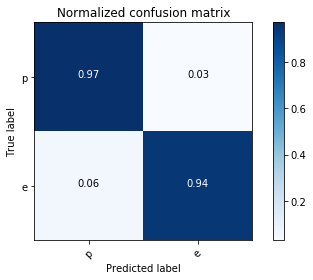

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1750
           e       0.94      0.94      0.94      1072

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9557051736357194


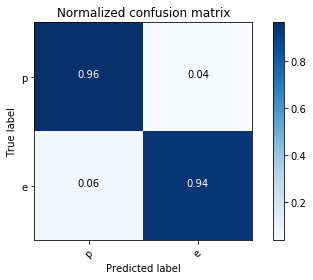

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1738
           e       0.95      0.95      0.95      1084

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.959603118355776


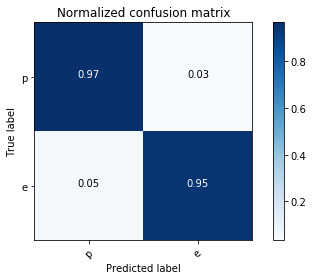

In [15]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1775
           e       0.94      0.94      0.94      1047

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9549964564138909


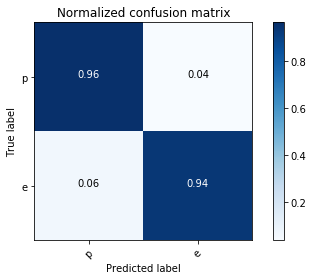

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1713
           e       0.95      0.93      0.94      1109

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9521615875265769


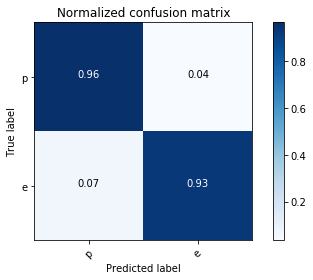

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1755
           e       0.94      0.94      0.94      1067

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.95      0.96      2822

accuracy:  0.9549964564138909


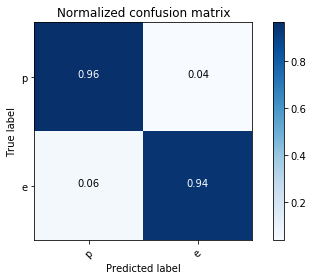

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1733
           e       0.95      0.93      0.94      1089

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9539333805811481


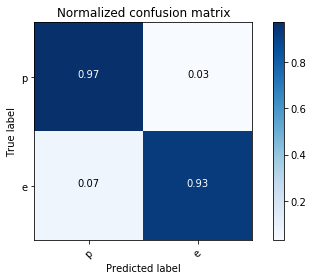

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1733
           e       0.96      0.93      0.95      1089

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9581856839121191


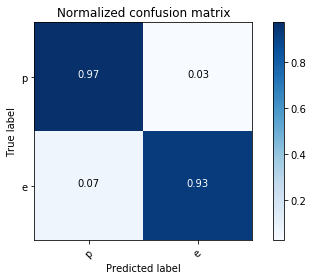

              precision    recall  f1-score   support

           p       0.97      0.96      0.97      1755
           e       0.94      0.95      0.94      1067

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9581856839121191


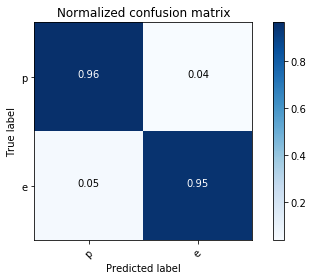

              precision    recall  f1-score   support

           p       0.97      0.97      0.97      1744
           e       0.95      0.94      0.94      1078

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9578313253012049


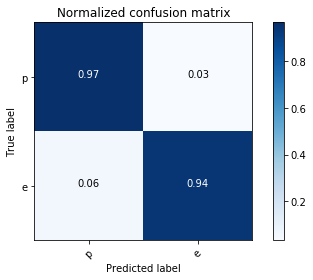

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1744
           e       0.95      0.93      0.94      1078

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9546420978029766


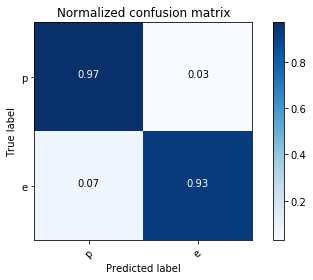

              precision    recall  f1-score   support

           p       0.97      0.96      0.96      1761
           e       0.93      0.95      0.94      1061

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.96      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


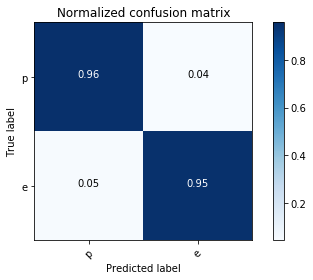

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1727
           e       0.96      0.92      0.94      1095

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.95      0.95      2822

accuracy:  0.9549964564138909


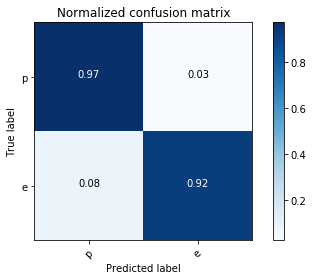

In [16]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.95      0.98      0.96      1750
           e       0.96      0.92      0.94      1072

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9557051736357194


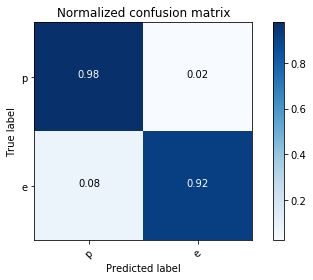

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1738
           e       0.94      0.94      0.94      1084

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9549964564138909


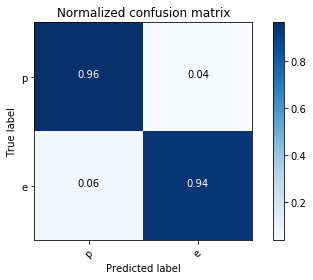

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1728
           e       0.95      0.93      0.94      1094

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9514528703047485


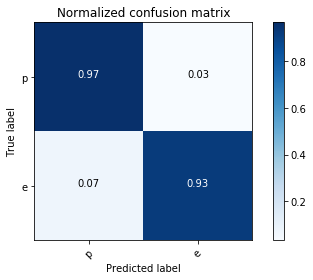

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1760
           e       0.96      0.93      0.94      1062

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


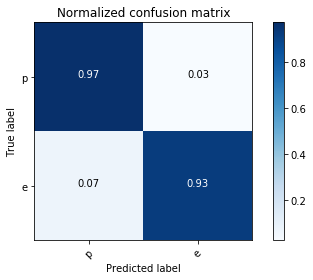

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1718
           e       0.95      0.94      0.95      1104

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.96      0.96      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.959603118355776


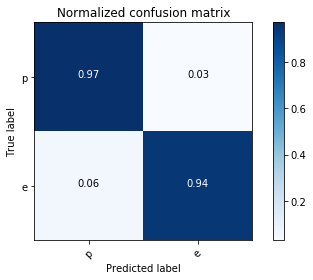

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1770
           e       0.95      0.92      0.93      1052

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9489723600283487


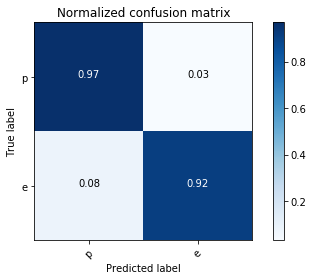

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1704
           e       0.96      0.92      0.94      1118

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9507441530829199


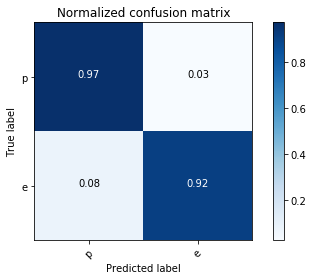

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1784
           e       0.95      0.93      0.94      1038

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9574769666902906


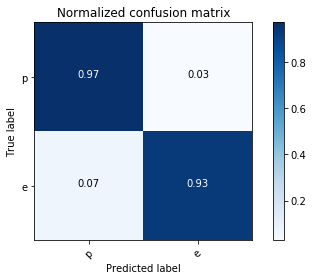

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1794
           e       0.94      0.93      0.93      1028

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9518072289156626


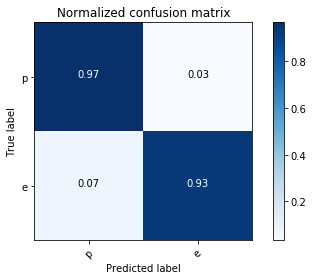

              precision    recall  f1-score   support

           p       0.95      0.98      0.96      1694
           e       0.96      0.93      0.94      1128

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9567682494684621


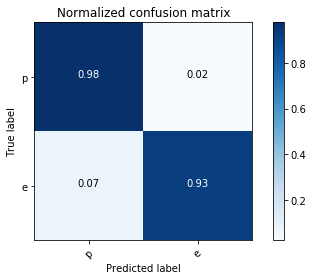

In [17]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1751
           e       0.94      0.93      0.94      1071

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9525159461374911


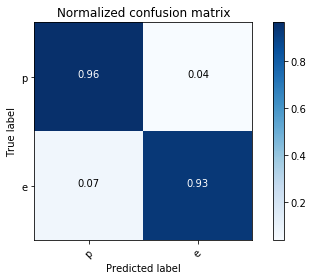

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1737
           e       0.95      0.93      0.94      1085

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9557051736357194


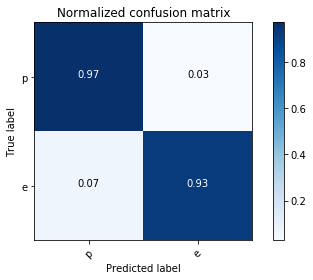

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1725
           e       0.95      0.92      0.94      1097

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9503897944720057


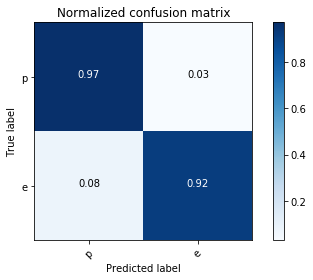

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1763
           e       0.95      0.94      0.94      1059

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9567682494684621


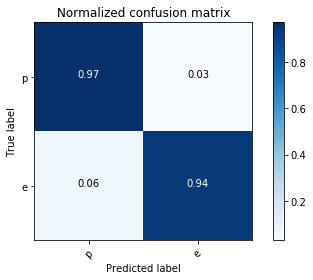

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1744
           e       0.94      0.93      0.93      1078

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9503897944720057


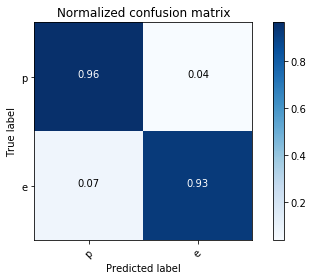

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1744
           e       0.95      0.94      0.94      1078

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


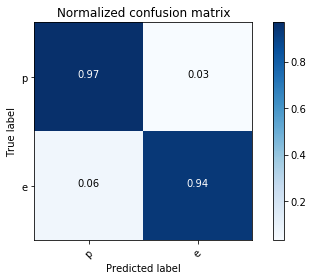

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1759
           e       0.94      0.93      0.93      1063

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9500354358610914


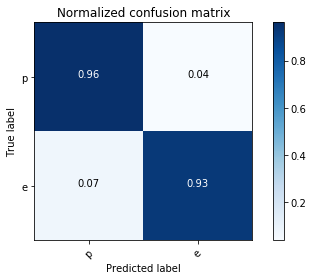

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1729
           e       0.95      0.94      0.94      1093

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


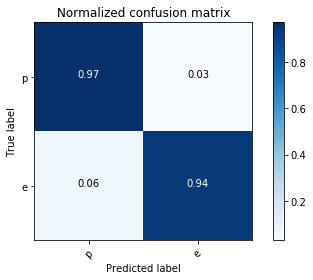

              precision    recall  f1-score   support

           p       0.96      0.97      0.97      1714
           e       0.96      0.93      0.94      1108

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9571226080793763


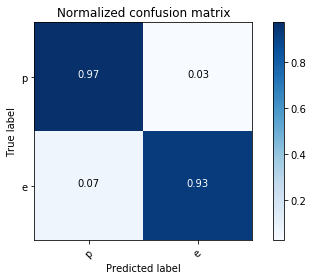

              precision    recall  f1-score   support

           p       0.96      0.96      0.96      1774
           e       0.94      0.93      0.93      1048

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9500354358610914


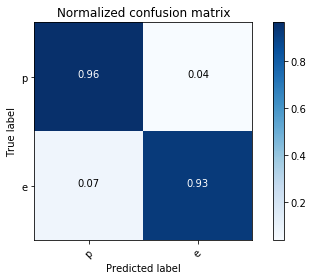

In [18]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
#             print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.94      0.97      0.95      1708
           e       0.95      0.91      0.93      1114

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9447200566973778


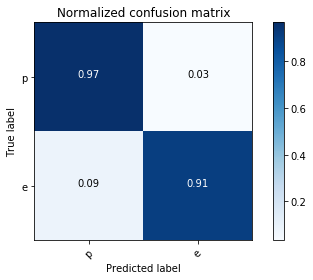

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1780
           e       0.95      0.92      0.94      1042

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


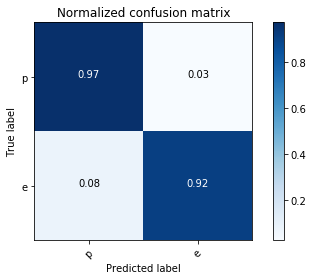

              precision    recall  f1-score   support

           p       0.95      0.98      0.97      1745
           e       0.96      0.92      0.94      1077

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.96      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


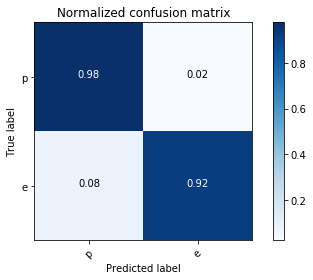

              precision    recall  f1-score   support

           p       0.95      0.96      0.95      1743
           e       0.94      0.91      0.92      1079

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.94      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9429482636428065


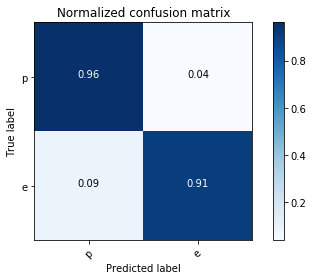

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1743
           e       0.95      0.94      0.94      1079

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9564138908575478


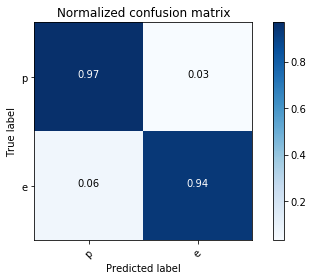

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1745
           e       0.95      0.91      0.93      1077

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.94      2822

accuracy:  0.945074415308292


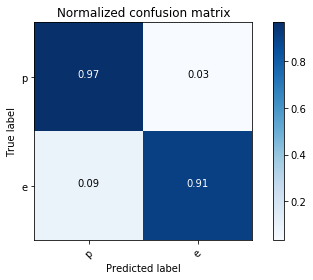

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1742
           e       0.95      0.92      0.93      1080

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9503897944720057


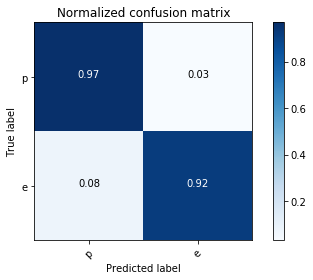

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1746
           e       0.95      0.93      0.94      1076

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


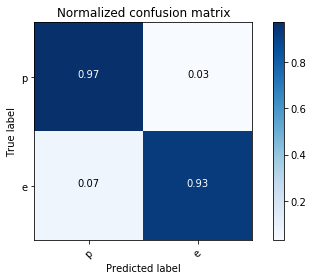

              precision    recall  f1-score   support

           p       0.96      0.97      0.96      1748
           e       0.95      0.94      0.94      1074

   micro avg       0.96      0.96      0.96      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.96      0.96      0.96      2822

accuracy:  0.9560595322466336


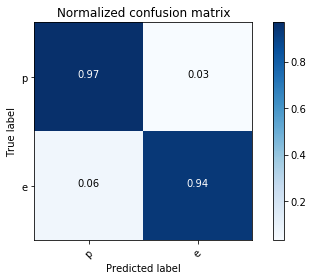

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1740
           e       0.95      0.91      0.93      1082

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9479092841956059


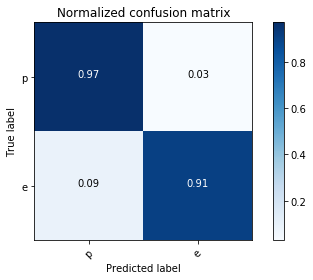

In [19]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1725
           e       0.95      0.88      0.92      1097

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9369241672572644


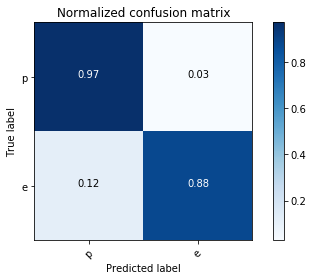

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1763
           e       0.95      0.91      0.93      1059

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9475549255846917


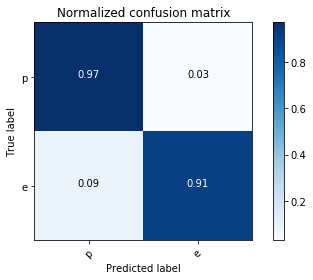

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1754
           e       0.95      0.89      0.92      1068

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9397590361445783


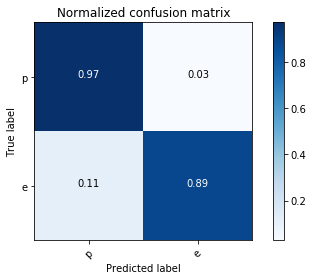

              precision    recall  f1-score   support

           p       0.94      0.97      0.95      1734
           e       0.94      0.90      0.92      1088

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.94      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9415308291991495


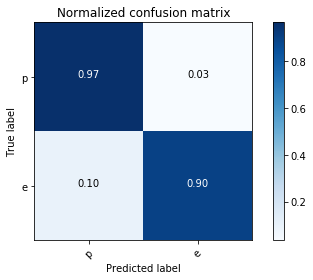

              precision    recall  f1-score   support

           p       0.94      0.96      0.95      1744
           e       0.93      0.89      0.91      1078

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.93      0.93      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9340892983699504


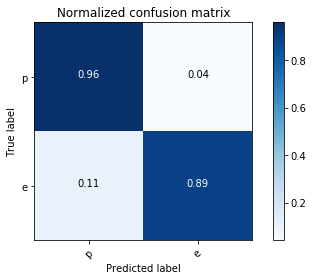

              precision    recall  f1-score   support

           p       0.94      0.98      0.96      1744
           e       0.96      0.90      0.93      1078

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9468462083628633


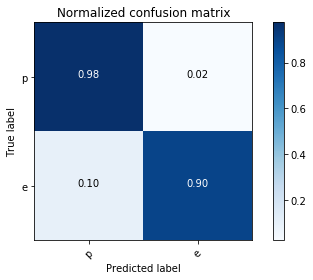

              precision    recall  f1-score   support

           p       0.94      0.96      0.95      1746
           e       0.93      0.90      0.92      1076

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9369241672572644


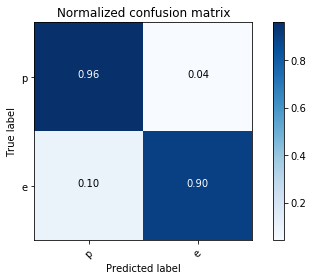

              precision    recall  f1-score   support

           p       0.94      0.97      0.96      1742
           e       0.96      0.90      0.93      1080

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.94      0.94      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9472005669737774


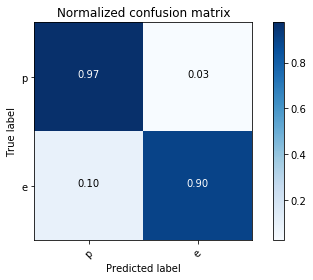

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1751
           e       0.94      0.87      0.91      1071

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.92      0.93      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.9309000708717222


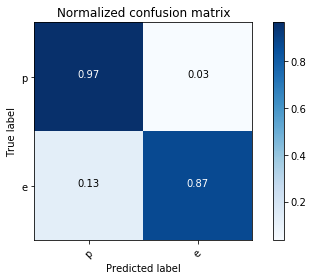

              precision    recall  f1-score   support

           p       0.95      0.97      0.96      1737
           e       0.95      0.92      0.94      1085

   micro avg       0.95      0.95      0.95      2822
   macro avg       0.95      0.95      0.95      2822
weighted avg       0.95      0.95      0.95      2822

accuracy:  0.9532246633593197


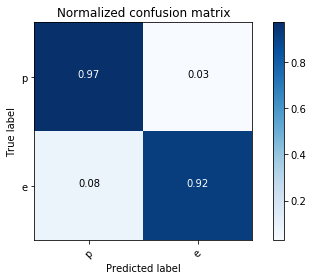

In [20]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1757
           e       0.95      0.88      0.91      1065

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.92      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9362154500354358


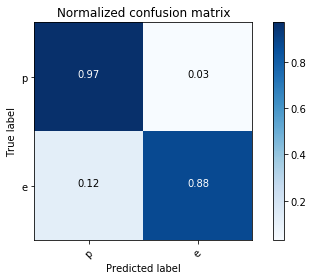

              precision    recall  f1-score   support

           p       0.90      0.97      0.94      1731
           e       0.95      0.83      0.89      1091

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.90      0.91      2822
weighted avg       0.92      0.92      0.92      2822

accuracy:  0.9195605953224664


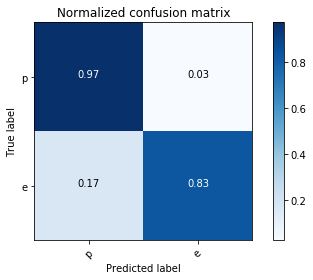

              precision    recall  f1-score   support

           p       0.91      0.97      0.94      1729
           e       0.95      0.85      0.90      1093

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.92487597448618


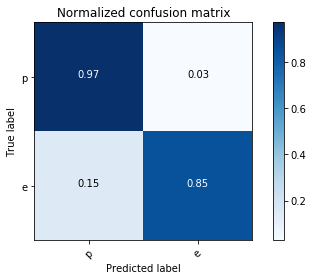

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1759
           e       0.95      0.85      0.90      1063

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.927710843373494


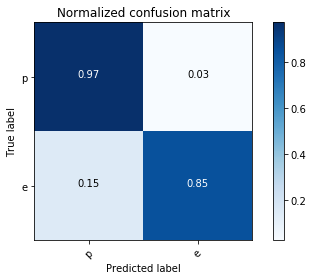

              precision    recall  f1-score   support

           p       0.91      0.97      0.94      1746
           e       0.95      0.85      0.90      1076

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9255846917080085


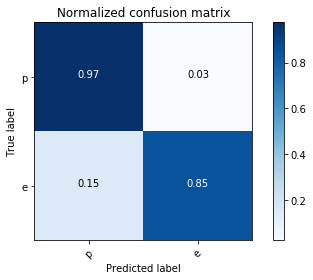

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1742
           e       0.95      0.86      0.90      1080

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.93      2822

accuracy:  0.927710843373494


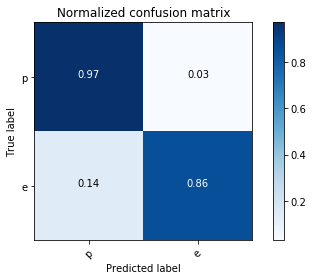

              precision    recall  f1-score   support

           p       0.90      0.98      0.94      1723
           e       0.96      0.84      0.89      1099

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.92      0.92      0.92      2822

accuracy:  0.9220411055988661


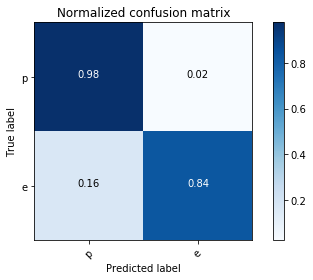

              precision    recall  f1-score   support

           p       0.93      0.97      0.95      1765
           e       0.95      0.89      0.92      1057

   micro avg       0.94      0.94      0.94      2822
   macro avg       0.94      0.93      0.93      2822
weighted avg       0.94      0.94      0.94      2822

accuracy:  0.9386959603118356


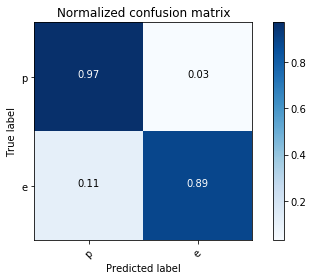

              precision    recall  f1-score   support

           p       0.91      0.98      0.94      1763
           e       0.96      0.84      0.89      1059

   micro avg       0.92      0.92      0.92      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.92      0.92      2822

accuracy:  0.92487597448618


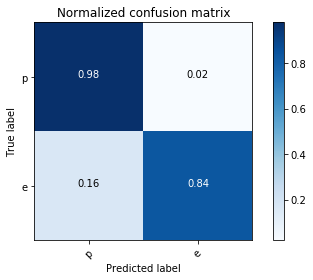

              precision    recall  f1-score   support

           p       0.92      0.97      0.94      1725
           e       0.94      0.86      0.90      1097

   micro avg       0.93      0.93      0.93      2822
   macro avg       0.93      0.91      0.92      2822
weighted avg       0.93      0.93      0.92      2822

accuracy:  0.9255846917080085


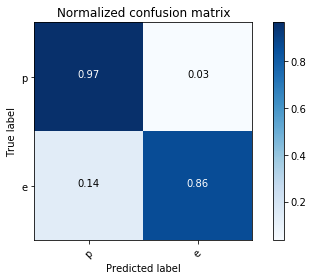

In [21]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.86      0.99      0.92      1758
           e       0.97      0.74      0.84      1064

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.86      0.88      2822
weighted avg       0.90      0.89      0.89      2822

accuracy:  0.8936924167257264


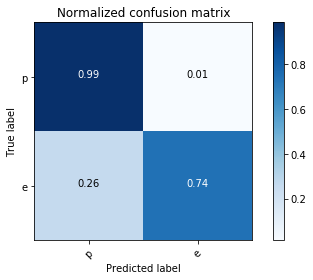

              precision    recall  f1-score   support

           p       0.85      0.99      0.91      1730
           e       0.97      0.72      0.83      1092

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.89      0.88      0.88      2822

accuracy:  0.8823529411764706


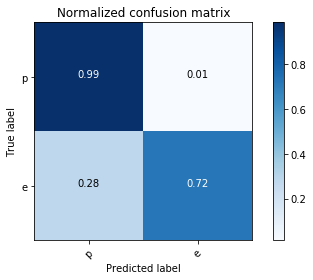

              precision    recall  f1-score   support

           p       0.86      0.98      0.92      1761
           e       0.96      0.74      0.84      1061

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.86      0.88      2822
weighted avg       0.90      0.89      0.89      2822

accuracy:  0.8912119064493267


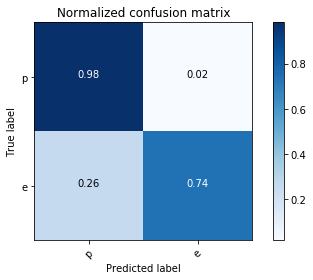

              precision    recall  f1-score   support

           p       0.85      0.98      0.91      1727
           e       0.97      0.72      0.83      1095

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.89      0.88      0.88      2822

accuracy:  0.8827072997873848


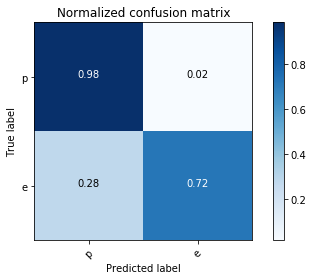

              precision    recall  f1-score   support

           p       0.86      0.98      0.92      1737
           e       0.97      0.75      0.85      1085

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.92      0.87      0.88      2822
weighted avg       0.90      0.89      0.89      2822

accuracy:  0.8944011339475549


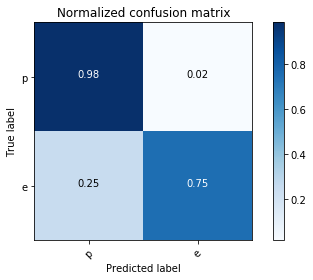

              precision    recall  f1-score   support

           p       0.86      0.99      0.92      1751
           e       0.97      0.73      0.83      1071

   micro avg       0.89      0.89      0.89      2822
   macro avg       0.91      0.86      0.87      2822
weighted avg       0.90      0.89      0.88      2822

accuracy:  0.888731396172927


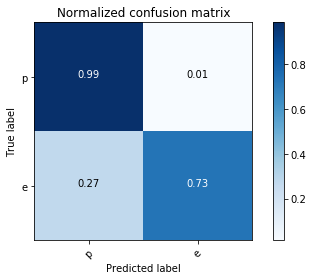

              precision    recall  f1-score   support

           p       0.87      0.98      0.92      1748
           e       0.97      0.76      0.85      1074

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.87      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.8982990786676116


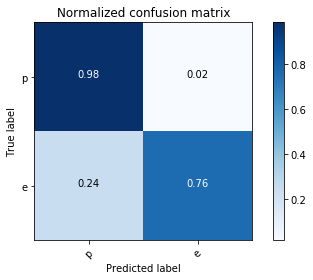

              precision    recall  f1-score   support

           p       0.85      0.98      0.91      1740
           e       0.96      0.72      0.82      1082

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.85      0.87      2822
weighted avg       0.89      0.88      0.88      2822

accuracy:  0.8805811481218994


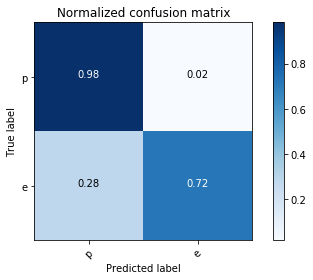

              precision    recall  f1-score   support

           p       0.87      0.99      0.93      1742
           e       0.97      0.77      0.86      1080

   micro avg       0.90      0.90      0.90      2822
   macro avg       0.92      0.88      0.89      2822
weighted avg       0.91      0.90      0.90      2822

accuracy:  0.9021970233876683


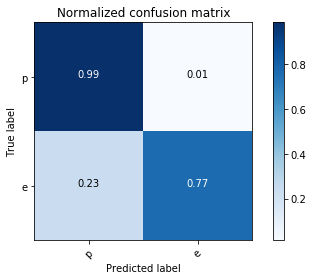

              precision    recall  f1-score   support

           p       0.84      0.99      0.91      1746
           e       0.97      0.70      0.82      1076

   micro avg       0.88      0.88      0.88      2822
   macro avg       0.91      0.84      0.86      2822
weighted avg       0.89      0.88      0.87      2822

accuracy:  0.8781006378454996


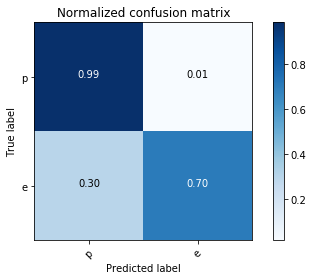

In [22]:
acc.append("Minkowski 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1743
           e       0.98      0.65      0.78      1079

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8600283486888731


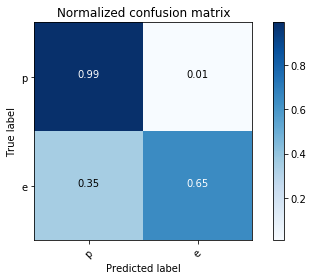

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1745
           e       0.98      0.64      0.77      1077

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.83      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8571934798015591


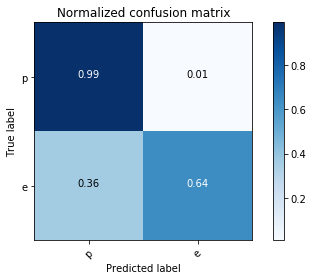

              precision    recall  f1-score   support

           p       0.81      0.99      0.89      1722
           e       0.98      0.63      0.76      1100

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.89      0.81      0.83      2822
weighted avg       0.87      0.85      0.84      2822

accuracy:  0.8497519489723601


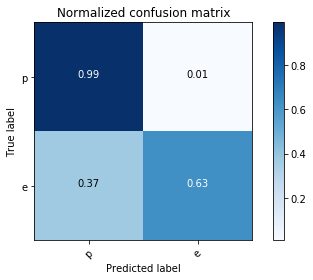

              precision    recall  f1-score   support

           p       0.83      0.99      0.90      1766
           e       0.98      0.66      0.79      1056

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.90      0.83      0.85      2822
weighted avg       0.89      0.87      0.86      2822

accuracy:  0.8678242381289866


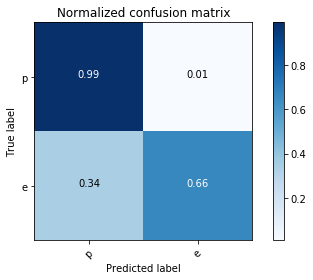

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1754
           e       0.98      0.64      0.77      1068

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.81      0.83      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8571934798015591


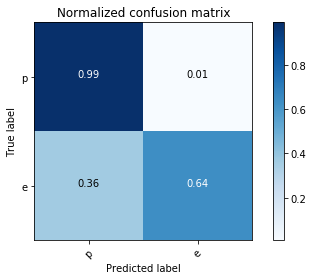

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1734
           e       0.98      0.66      0.79      1088

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.86      2822

accuracy:  0.8621545003543586


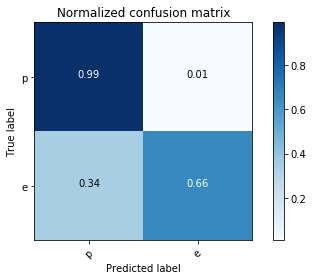

              precision    recall  f1-score   support

           p       0.83      0.99      0.90      1742
           e       0.98      0.66      0.79      1080

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.83      0.84      2822
weighted avg       0.88      0.86      0.86      2822

accuracy:  0.8646350106307583


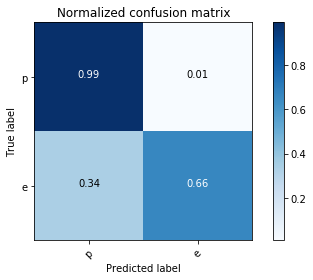

              precision    recall  f1-score   support

           p       0.82      0.99      0.90      1746
           e       0.98      0.64      0.78      1076

   micro avg       0.86      0.86      0.86      2822
   macro avg       0.90      0.82      0.84      2822
weighted avg       0.88      0.86      0.85      2822

accuracy:  0.8589652728561304


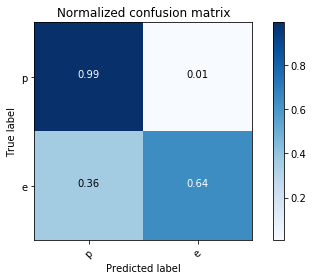

              precision    recall  f1-score   support

           p       0.81      0.99      0.89      1734
           e       0.99      0.62      0.76      1088

   micro avg       0.85      0.85      0.85      2822
   macro avg       0.90      0.81      0.83      2822
weighted avg       0.88      0.85      0.84      2822

accuracy:  0.8504606661941885


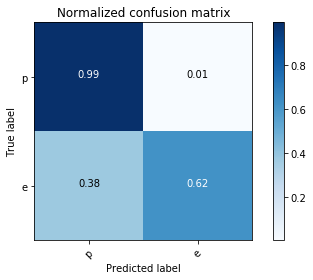

              precision    recall  f1-score   support

           p       0.84      0.99      0.91      1754
           e       0.98      0.68      0.80      1068

   micro avg       0.87      0.87      0.87      2822
   macro avg       0.91      0.84      0.85      2822
weighted avg       0.89      0.87      0.87      2822

accuracy:  0.8734939759036144


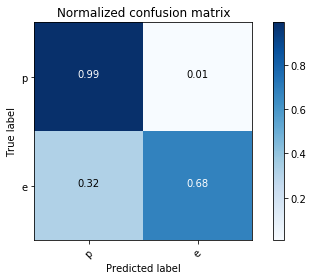

In [23]:
acc.append("Minkowski 150")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [25]:
with open("accMushroomKNNWith10Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)